In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo, data
from memory_profiler import profile
import gc
import objgraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
cc = detgeo.get_quantities("mutristan_small", N_evals = 1e5)

In [12]:
Lc_factor = 0
geom = "approximate_muon_detector_2"
particle = 'both'
sim,sim2 = detgeo.SimulateDetector(cc, Lc_factor, geom, particle).run()

sim time: 0.192 (0.00179 init; 0.00249 init obj; 0.151 obj; 0.0249 get_probs; 0.00548 uniform rvs; 0.00682 event pos)
sim time: 0.194 (0.00175 init; 0.0025 init obj; 0.153 obj; 0.0248 get_probs; 0.00546 uniform rvs; 0.00692 event pos)
+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 7.458e+10  |  4.512e+10  |  1.197e+11   |
|    solenoid    | 3.853e+09  |  2.376e+09  |  6.228e+09   |
|      hcal      | 4.141e+10  |  2.484e+10  |  6.625e+10   |
|      ecal      | 8.591e+09  |  5.430e+09  |  1.402e+10   |
|    nozzles     | 1.127e+11  |  7.156e+10  |  1.842e+11   |
|     TOTAL      | 2.411e+11  |  1.493e+11  |  3.904e+11   |
+----------------+------------+-------------+--------------+


In [23]:
print(f'{sim.total_count:.3g}, {sim2.total_count:.3g}')

2.81e+09, 5.42e+09


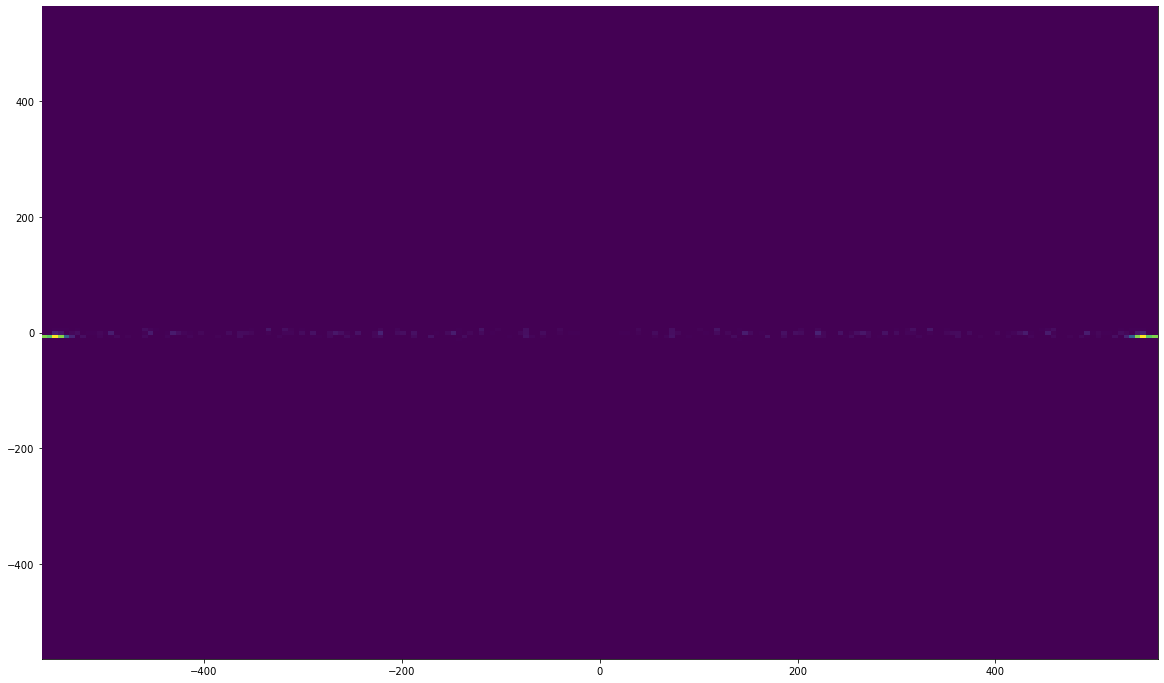

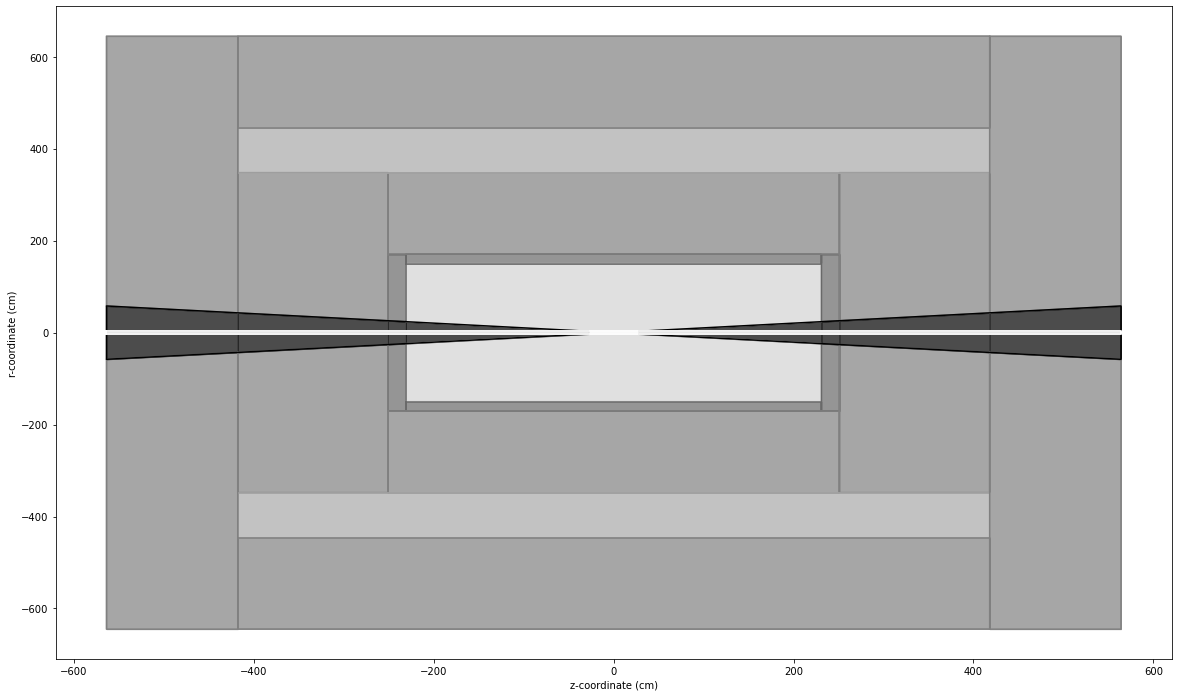

In [11]:
arr = sim.events_position
arr2 = sim2.events_position
plt.figure(figsize=(20,12))
bs = np.linspace(-564, 564, 200)
bs2 = np.linspace(-645, 645, 200)
plt.hist2d(np.concatenate((arr[:, :,2].flatten(), arr2[:, :,2].flatten(), -1*arr[:, :,2].flatten(), -1 * arr2[:, :,2].flatten())), np.concatenate((arr[:,:,1].flatten(), arr2[:, :,1].flatten(), arr[:,:,1].flatten(), arr2[:, :,1].flatten())), alpha = 1, zorder = 10, bins = (bs), weights = np.concatenate((sim.part_face_counts.flatten()/2,sim2.part_face_counts.flatten()/2, sim.part_face_counts.flatten()/2, sim2.part_face_counts.flatten()/2)))

detgeo.plot_sim(geom)

In [6]:
detgeo.che()

mem
Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   478    794.8 MiB    794.8 MiB           1   @profile
   479                                         def che():
   480    794.8 MiB      0.0 MiB           1       print('mem')


